In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sks
import matplotlib.pyplot as plt

In [2]:
t=pd.read_csv("Titanic-Dataset.csv")

In [3]:
#describing about the data
t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#checking for null values
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#replacing null values with median in age
t.fillna(t['Age'].median(),inplace=True)

In [6]:
#replacing null values with mode in embarked
t.fillna(t['Embarked'].mode()[0],inplace=True)


In [7]:
#droping the cabin it has so many null values
t.drop('Cabin',axis=1,inplace=True)

In [8]:
t.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
#now repalce the sex column with integer values
label=LabelEncoder()
t['Sex']=label.fit_transform(t['Sex'])
#convert embarked into numeric values
t=pd.get_dummies(t,columns=['Embarked'],drop_first=True)

In [10]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,False,True


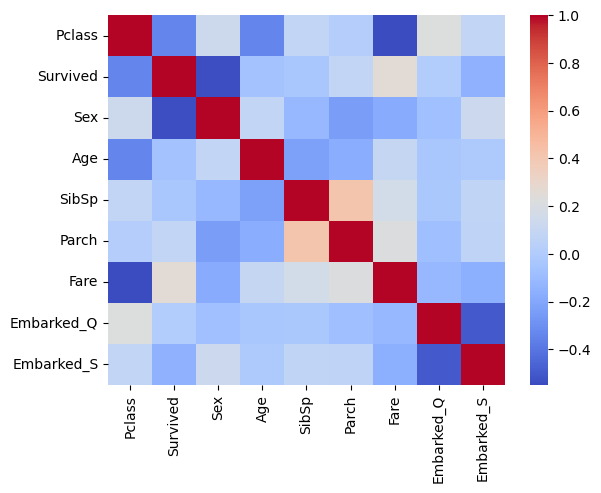

In [11]:
#checking the correlation
sks.heatmap(t[['Pclass', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_Q','Embarked_S']].corr(),cmap='coolwarm')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

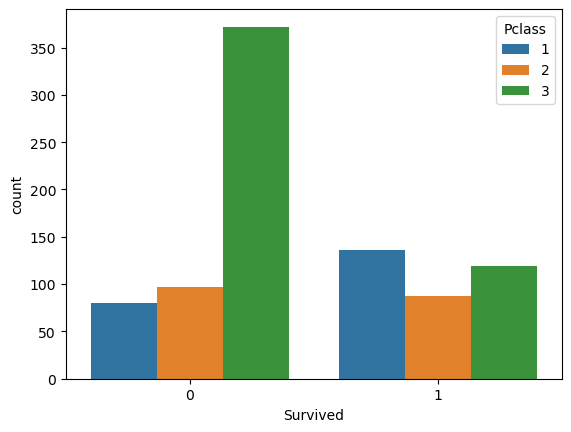

In [12]:
sks.countplot(x=t['Survived'],hue=t['Pclass'])

<Axes: xlabel='Survived', ylabel='count'>

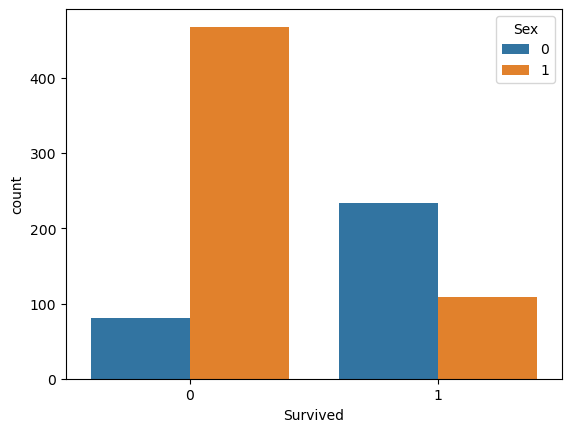

In [13]:
#the survived are correlated with the sex and pclass columns and checking for further classifications
sks.countplot(x=t['Survived'],hue=t['Sex'])

In [14]:
X=t[['Pclass', 'Sex',]]
y=t['Survived']


In [15]:
#now spliting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
result=model.predict([[3,0]])
if result==0:
    print("NOt Survived!")
else:
    print("survived")

survived
